In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [3]:
NUM_CLASSES = 10

In [4]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [5]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
## Model Creation Starts Here

In [7]:
# Sequential Model
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [8]:
modelSeq = Sequential([
    Dense(200, activation='relu', input_shape=(32,32,3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])

In [9]:
# Functional API Model
from keras.layers import Input,Flatten,Dense
from keras.models import Model

In [10]:
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10,activation='softmax')(x)

modelFunc = Model(input_layer, output_layer)

In [11]:
# Convolutional Model
from keras.layers import Conv2D, BatchNormalization, Activation, LeakyReLU, Dropout

In [12]:
input_layer = Input(shape=(32,32,3))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

modelCon = Model(input_layer, output_layer)

In [13]:
modelSeq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 200)       800       
                                                                 
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense_1 (Dense)             (None, 150)               30720150  
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


In [14]:
modelFunc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [15]:
modelCon.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

In [16]:
from keras.optimizers import Adam

optm = Adam(learning_rate=0.0005)
modelCon.compile(loss='categorical_crossentropy', optimizer=optm, metrics=['accuracy'])

In [17]:
modelCon.fit(x_train,
            y_train,
            batch_size=32,
            epochs=10,
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.5512 - accuracy: 0.4585
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1355 - accuracy: 0.5996
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9862 - accuracy: 0.6534
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9108 - accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8434 - accuracy: 0.7068
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7967 - accuracy: 0.7237
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7565 - accuracy: 0.7355
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7158 - accuracy: 0.7477
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6799 - accuracy: 0.7618
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [18]:
modelCon.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8414 - accuracy: 0.7195


[0.8414434790611267, 0.7195000052452087]

In [19]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds = modelCon.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 4s 13ms/step


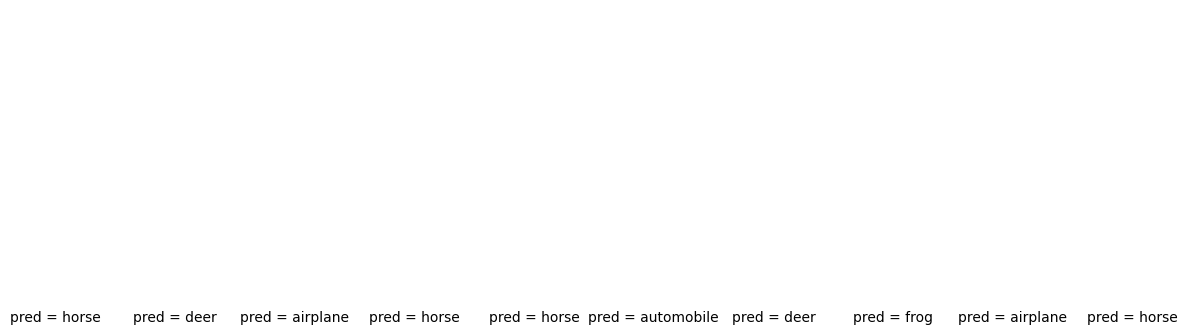

In [26]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)